In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import os
def plot_figure(file_path, x_axis_col, y_axis_col,x_label,y_label, sub_plt,title):
    data = pd.read_csv(file_path)
    x_data = data[x_axis_col].to_numpy()
    y_data = data[y_axis_col].to_numpy()
    if(y_axis_col=="succs"):
        print(y_label+ " mean",np.mean(y_data))
    # data.plot(kind='line',x=x_axis_col,y=y_axis_col,ax=plt.gca())
    sub_plt.set_xlabel(x_label)
    sub_plt.set_ylabel(y_label)
    sub_plt.set_title(title)
    sub_plt.xaxis.set_major_locator(MaxNLocator(integer=True))
    # sub_plt.set_xticks()
    # sub_plt.set_yticks(np.arange(0,100,10))
    sub_plt.plot(x_data,y_data)

In [22]:
def get_dir_session_files(dir_path):
    files = os.listdir(dir_path)
    inv_file = None
    timing_file = None
    selected_details_file = None
    for file in files:
        if file.startswith("invocation_"):
            inv_file = os.path.join(dir_path, file)
        if file.startswith("timing_"):
            timing_file = os.path.join(dir_path, file)
        if file.startswith("clients"):
            selected_details_file = os.path.join(dir_path, file)
    return inv_file, timing_file,selected_details_file

def get_variance(clients_log_path, plot):
    data = pd.read_csv(clients_log_path)
    grouped_data= data.groupby(['client_id']).size()
    print("num clients:", len(grouped_data))
    print(grouped_data[0])
    plot.plot(grouped_data, np.arange(len(grouped_data)))
    return max(grouped_data),min(grouped_data)
        
def plot_dataset_compare_3(path_normals,path_enhanced,titles):

    x_labels = [("round_id", "round number"),("round_id", "round number")]
    y_labels = [("succs", "EUR"),("global_test_accuracy","accuracy")]
    graph_titles = ["Effective Update Ratio", "Test Accuracy"]
    acc, acc_plts = plt.subplots(1, len(path_normals),figsize=(14,4))
    eur, eur_plts = plt.subplots(1,len(path_normals),figsize=(14,4))
    var, num_inv_plts = plt.subplots(1,len(path_normals),figsize=(14,4))
    
    if(len(path_normals)<=1):
        acc_plts = [acc_plts]
        eur_plts = [eur_plts]
        num_inv_plts = [num_inv_plts]
    acc.tight_layout(h_pad=6)
    eur.tight_layout(h_pad=6)
    for idx, (normal,enhanced) in enumerate(zip(path_normals,path_enhanced)):
        
        inv_path_normal,timing_path_normal,selected_normal = get_dir_session_files(normal)
        
        inv_path_enhanced,timing_path_enhanced, selected_enhanced  = get_dir_session_files(enhanced)
        
        # selected_normal = pd.read_csv(selected_normal)
        # selected_enhanced = pd.read_csv(selected_enhanced)
        # selected_data_norm= selected_normal.groupby(['client_id']).size()
        # selected_data_e= selected_enhanced.groupby(['client_id']).size()
        max_norm, min_norm = get_variance(selected_normal,num_inv_plts[idx])
        max_en, min_en = get_variance(selected_enhanced,num_inv_plts[idx])
        print(f'norm variance: {max_norm-min_norm} for max of {max_norm} and min of {min_norm}')
        print(f'enhanced variance: {max_en-min_en} for max of {max_en} and min of {min_en}')
        plot_figure(inv_path_normal,x_labels[0][0],y_labels[0][0],x_labels[0][1],y_labels[0][1],eur_plts[idx],titles[idx]+" "+graph_titles[0])
        plot_figure(timing_path_normal,x_labels[1][0],y_labels[1][0],x_labels[1][1],y_labels[1][1],acc_plts[idx],titles[idx]+" "+graph_titles[1])
        
        plot_figure(inv_path_enhanced,x_labels[0][0],y_labels[0][0],x_labels[0][1],y_labels[0][1],eur_plts[idx],titles[idx]+" "+graph_titles[0])
        plot_figure(timing_path_enhanced,x_labels[1][0],y_labels[1][0],x_labels[1][1],y_labels[1][1],acc_plts[idx],titles[idx]+" "+graph_titles[1])
        

num clients: 300
22
num clients: 300
27
norm variance: 27 for max of 40 and min of 13
enhanced variance: 7 for max of 33 and min of 26
EUR mean 100.0
EUR mean 100.0
num clients: 200
41
num clients: 200
40
norm variance: 28 for max of 52 and min of 24
enhanced variance: 23 for max of 53 and min of 30
EUR mean 100.0
EUR mean 100.0
num clients: 270
13
num clients: 270
15
norm variance: 17 for max of 26 and min of 9
enhanced variance: 13 for max of 25 and min of 12
EUR mean 120.0
EUR mean 120.0
num clients: 200
12
num clients: 200
9
norm variance: 17 for max of 19 and min of 2
enhanced variance: 24 for max of 26 and min of 2
EUR mean 25.0
EUR mean 25.0


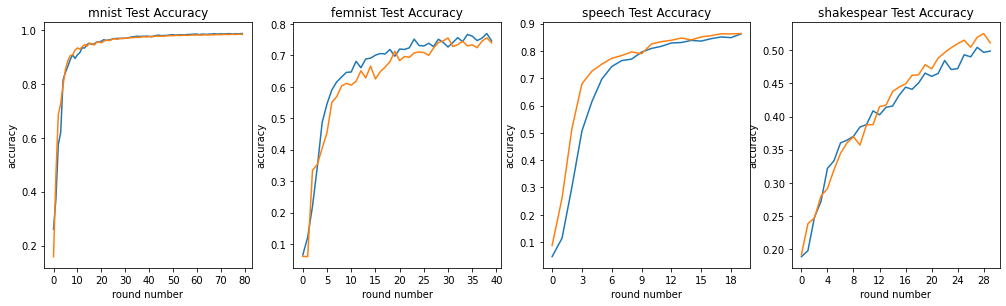

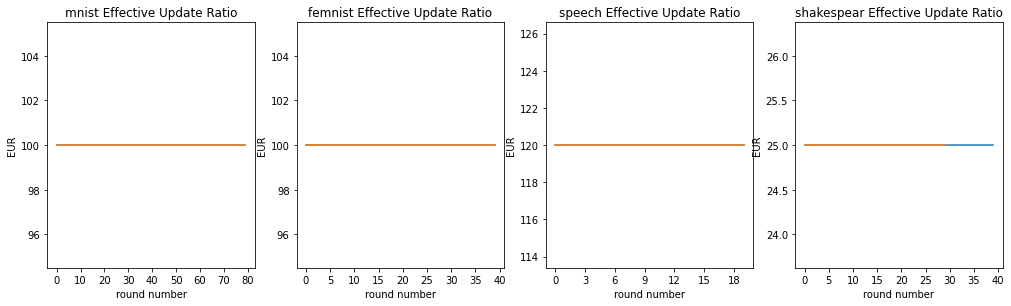

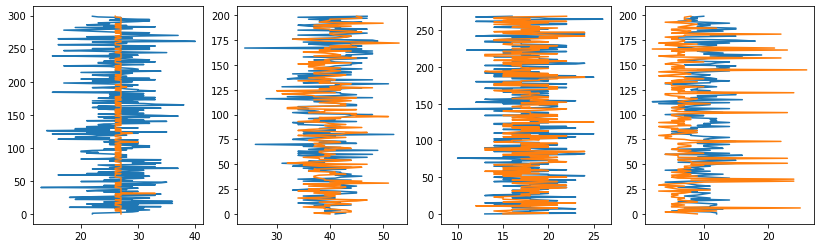

In [10]:
# ideal
base_path = "../../out/ideal"
dataset_titles = ["mnist","femnist","speech","shakespear"]

path_normals = [f'{base_path}2/mnist',f'{base_path}/femnist',f'{base_path}/speech',f'{base_path}/shakespeare']
path_enhanced = [f'{base_path}2/mnist-enhanced',f'{base_path}/femnist-enhanced',f'{base_path}/speech-enhanced',f'{base_path}/shakespeare-enhanced']


plot_dataset_compare_3(path_normals,path_enhanced,dataset_titles)

num clients: 270
16
num clients: 270
17
norm variance: 18 for max of 27 and min of 9
enhanced variance: 5 for max of 20 and min of 15
EUR mean 89.88
EUR mean 94.96
num clients: 240
19
num clients: 240
19
norm variance: 17 for max of 25 and min of 8
enhanced variance: 3 for max of 21 and min of 18
EUR mean 79.72
EUR mean 89.94
num clients: 210
15
num clients: 210
20
norm variance: 18 for max of 27 and min of 9
enhanced variance: 3 for max of 22 and min of 19
EUR mean 70.6
EUR mean 85.08


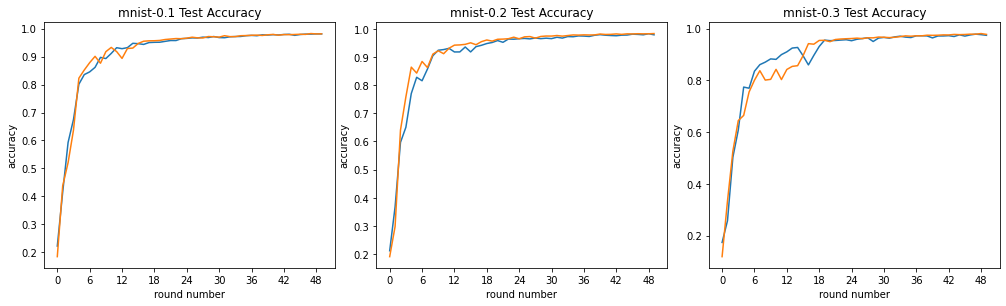

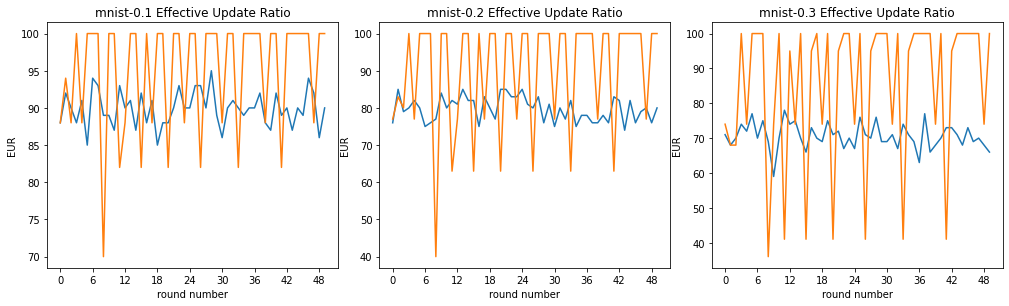

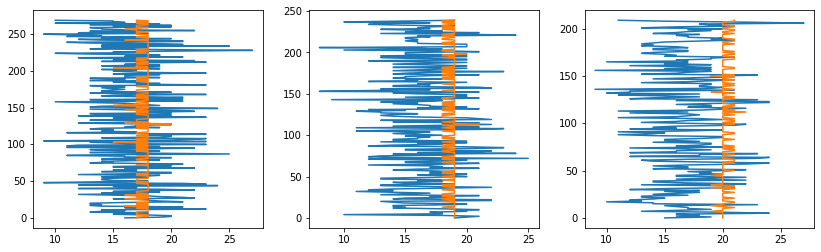

In [11]:
#minist controlled 
base_path = "../../out/controlled"
dataset_titles = ["mnist-0.1","mnist-0.2","mnist-0.3"]

path_normals = [f'{base_path}/mnist-0.1',f'{base_path}/mnist-0.2',f'{base_path}/mnist-0.3']
path_enhanced = [f'{base_path}/mnist-enhanced-0.1',f'{base_path}/mnist-enhanced-0.2',f'{base_path}/mnist-enhanced-0.3']


plot_dataset_compare_3(path_normals,path_enhanced,dataset_titles)

num clients: 270
18
num clients: 270
19
norm variance: 18 for max of 27 and min of 9
enhanced variance: 4 for max of 21 and min of 17
EUR mean 89.88
EUR mean 96.4
num clients: 240
14
num clients: 240
20
norm variance: 17 for max of 25 and min of 8
enhanced variance: 2 for max of 21 and min of 19
EUR mean 79.72
EUR mean 93.66
num clients: 210
15
num clients: 210
21
norm variance: 17 for max of 25 and min of 8
enhanced variance: 4 for max of 22 and min of 18
EUR mean 70.34
EUR mean 90.38


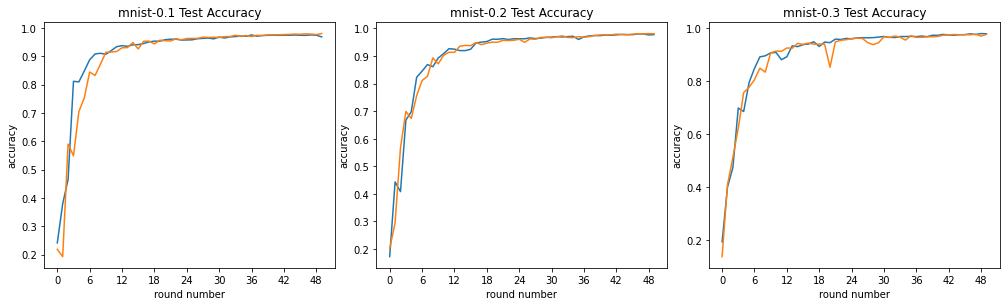

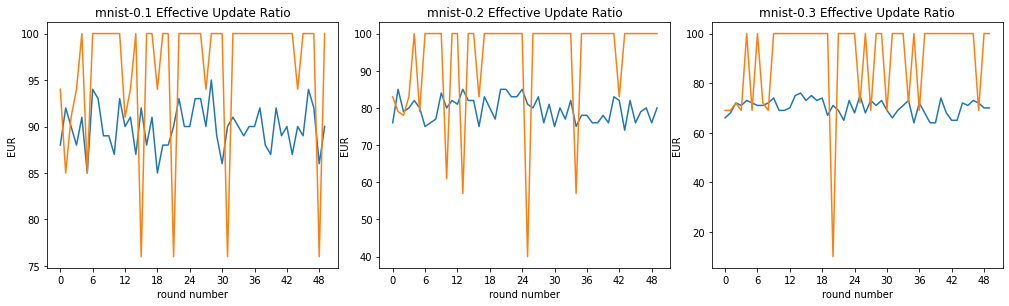

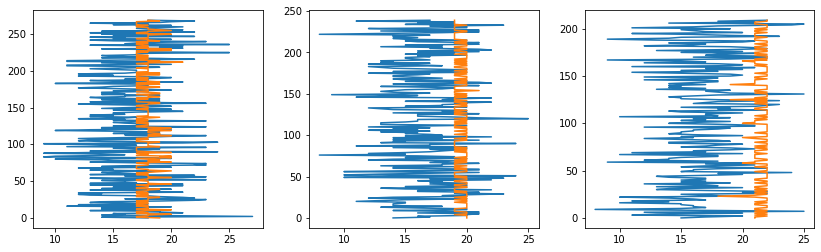

In [13]:
#minist controlled expo
base_path = "../../out/controlled-expo"
dataset_titles = ["mnist-0.1","mnist-0.2","mnist-0.3"]

path_normals = [f'{base_path}/mnist-0.1',f'{base_path}/mnist-0.2',f'{base_path}/mnist-0.3']
path_enhanced = [f'{base_path}/mnist-enhanced-0.1',f'{base_path}/mnist-enhanced-0.2',f'{base_path}/mnist-enhanced-0.3']


plot_dataset_compare_3(path_normals,path_enhanced,dataset_titles)


num clients: 200
20
num clients: 200
30
norm variance: 32 for max of 42 and min of 10
enhanced variance: 30 for max of 39 and min of 9
EUR mean 89.56666666666666
EUR mean 96.0
num clients: 200
25
num clients: 200
28
norm variance: 26 for max of 33 and min of 7
enhanced variance: 31 for max of 36 and min of 5
EUR mean 79.8
EUR mean 91.08
num clients: 200
17
num clients: 200
32
norm variance: 25 for max of 32 and min of 7
enhanced variance: 27 for max of 35 and min of 8
EUR mean 69.4
EUR mean 86.04


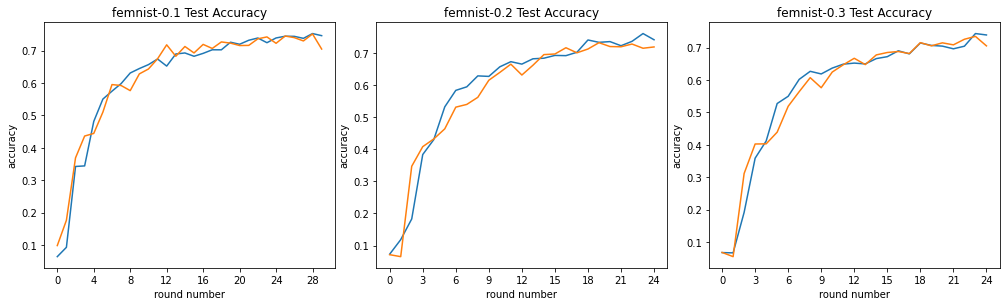

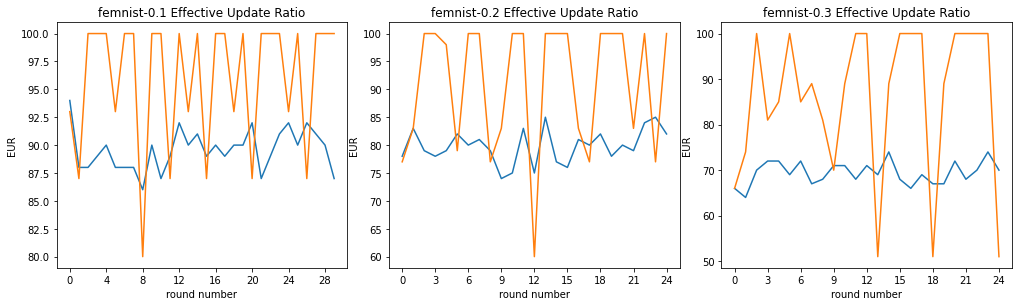

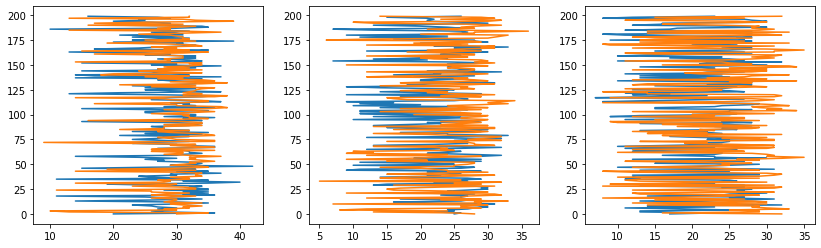

In [14]:
# feminist controlled
base_path = "../../out/controlled"
dataset_titles = ["femnist-0.1","femnist-0.2","femnist-0.3"]

path_normals = [f'{base_path}/femnist-0.1',f'{base_path}/femnist-0.2',f'{base_path}/femnist-0.3']
path_enhanced = [f'{base_path}/femnist-enhanced-0.1',f'{base_path}/femnist-enhanced-0.2',f'{base_path}/femnist-enhanced-0.3']


plot_dataset_compare_3(path_normals,path_enhanced,dataset_titles)


num clients: 193
15
num clients: 193
18
norm variance: 43 for max of 51 and min of 8
enhanced variance: 42 for max of 49 and min of 7
EUR mean 89.96666666666667
EUR mean 96.66666666666667
num clients: 184
16
num clients: 184
18
norm variance: 42 for max of 52 and min of 10
enhanced variance: 42 for max of 52 and min of 10
EUR mean 79.7
EUR mean 93.33333333333333
num clients: 171
12
num clients: 171
43
norm variance: 41 for max of 51 and min of 10
enhanced variance: 41 for max of 54 and min of 13
EUR mean 70.66666666666667
EUR mean 90.0


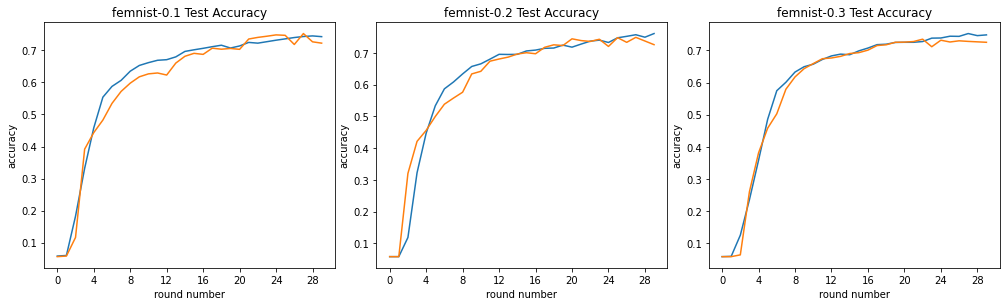

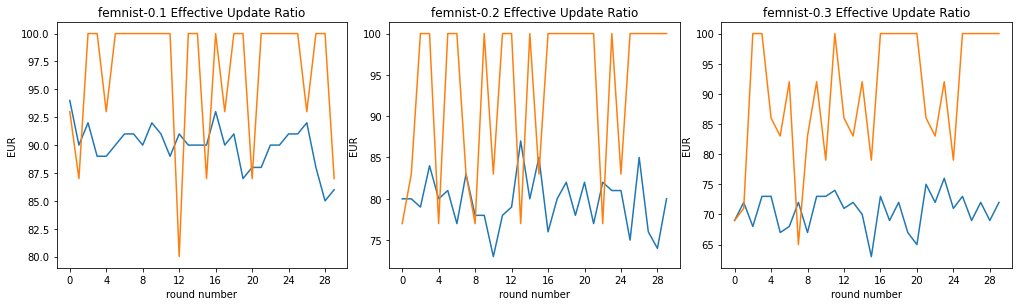

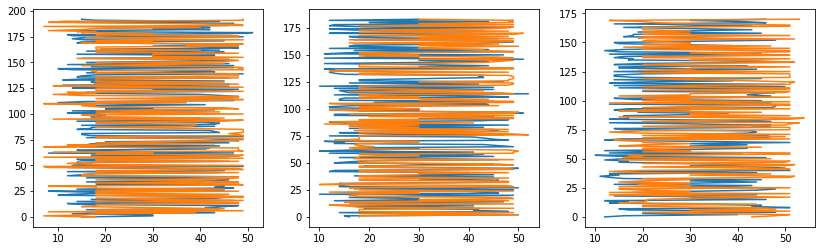

In [15]:
# feminist controlled expo
base_path = "../../out/controlled-expo"
dataset_titles = ["femnist-0.1","femnist-0.2","femnist-0.3"]

path_normals = [f'{base_path}/femnist-0.1',f'{base_path}/femnist-0.2',f'{base_path}/femnist-0.3']
path_enhanced = [f'{base_path}/femnist-enhanced-0.1',f'{base_path}/femnist-enhanced-0.2',f'{base_path}/femnist-enhanced-0.3']


plot_dataset_compare_3(path_normals,path_enhanced,dataset_titles)


num clients: 270
21
num clients: 270
22
norm variance: 23 for max of 28 and min of 5
enhanced variance: 21 for max of 25 and min of 4
EUR mean 89.84
EUR mean 95.68
num clients: 270
19
num clients: 270
6
norm variance: 20 for max of 23 and min of 3
enhanced variance: 19 for max of 23 and min of 4
EUR mean 78.5
EUR mean 87.95
num clients: 270
16
num clients: 270
16
norm variance: 22 for max of 24 and min of 2
enhanced variance: 19 for max of 21 and min of 2
EUR mean 69.45
EUR mean 83.8


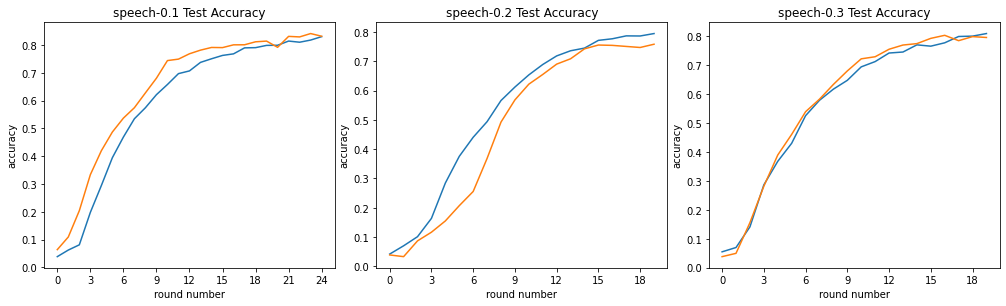

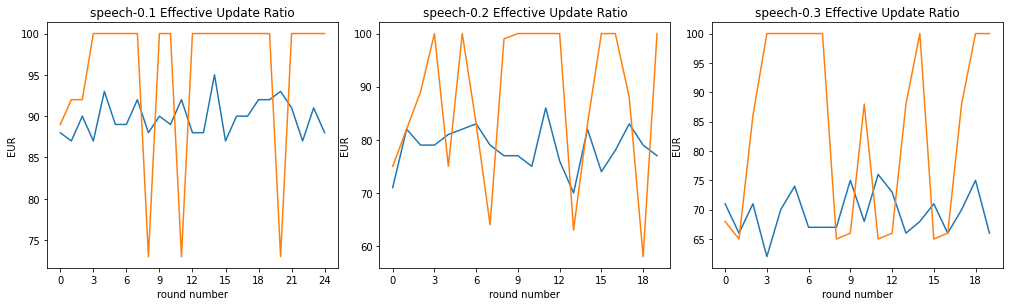

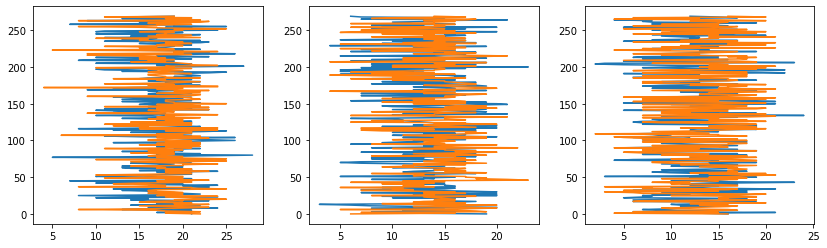

In [19]:
# speech controlled

base_path = "../../out/controlled"
dataset_titles = ["speech-0.1","speech-0.2","speech-0.3"]
path_normals = [f'{base_path}/speech-0.1',f'{base_path}/speech-0.2',f'{base_path}/speech-0.3-seed_10']
path_enhanced = [f'{base_path}/speech-enhanced-0.1',f'{base_path}/speech-enhanced-0.2',f'{base_path}/speech-enhanced-0.3-seed_10']

plot_dataset_compare_3(path_normals,path_enhanced,dataset_titles)

num clients: 256
9
num clients: 256
13
norm variance: 43 for max of 47 and min of 4
enhanced variance: 36 for max of 44 and min of 8
EUR mean 89.03333333333333
EUR mean 98.2
num clients: 234
47
num clients: 234
45
norm variance: 43 for max of 47 and min of 4
enhanced variance: 36 for max of 47 and min of 11
EUR mean 80.66666666666667
EUR mean 91.83333333333333
num clients: 240
3
num clients: 220
15
norm variance: 46 for max of 48 and min of 2
enhanced variance: 35 for max of 45 and min of 10
EUR mean 76.7
EUR mean 87.16666666666667


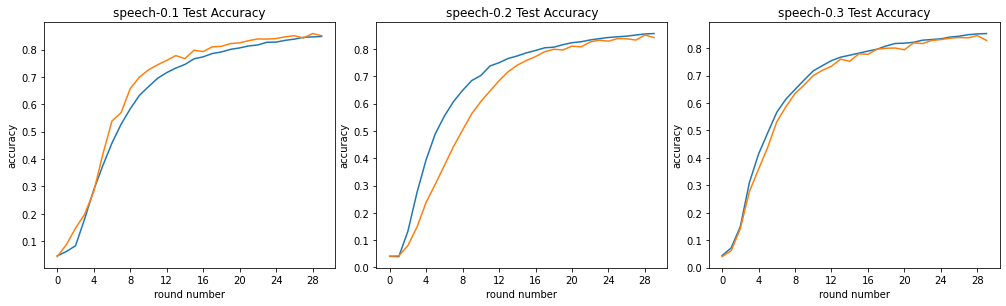

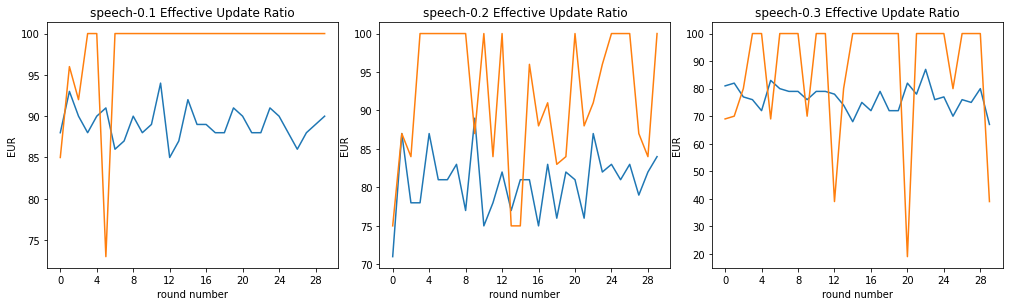

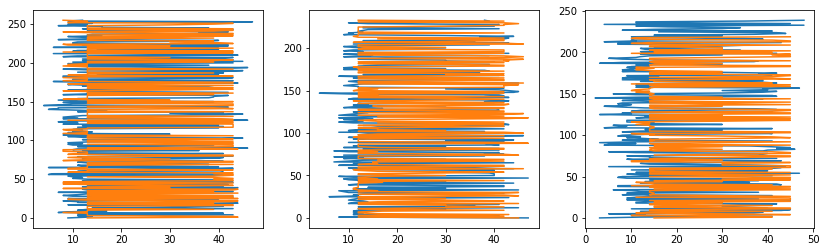

In [20]:
# speech controlled expo

base_path = "../../out/controlled-expo"
dataset_titles = ["speech-0.1","speech-0.2","speech-0.3"]
path_normals = [f'{base_path}/speech-0.1',f'{base_path}/speech-0.2',f'{base_path}/speech-0.3']
path_enhanced = [f'{base_path}/speech-enhanced-0.1',f'{base_path}/speech-enhanced-0.2',f'{base_path}/speech-enhanced-0.3']

plot_dataset_compare_3(path_normals,path_enhanced,dataset_titles)

num clients: 297
27
num clients: 297
27
norm variance: 25 for max of 40 and min of 15
enhanced variance: 10 for max of 34 and min of 24
EUR mean 97.8125
EUR mean 99.6625


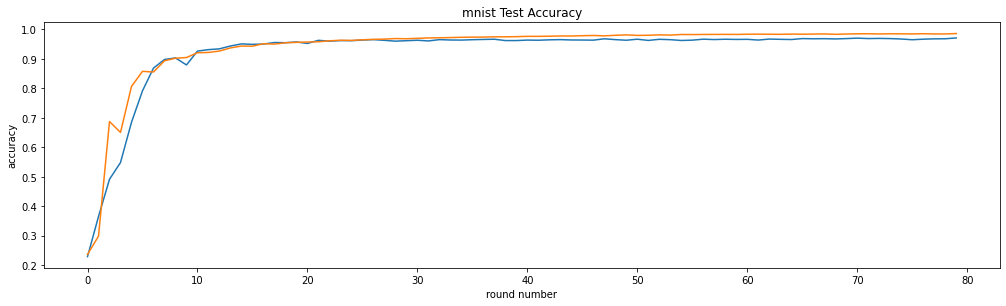

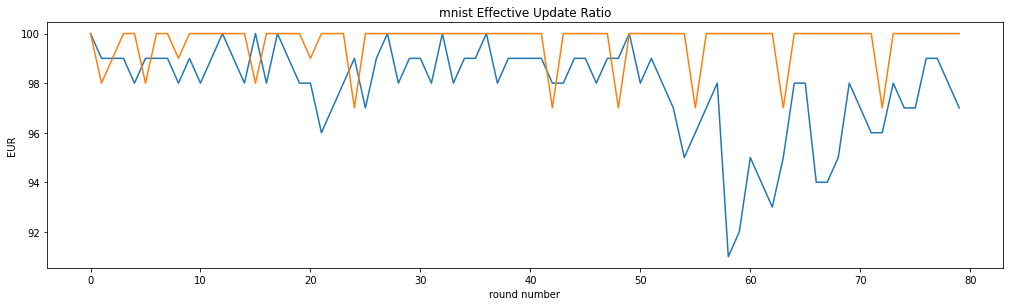

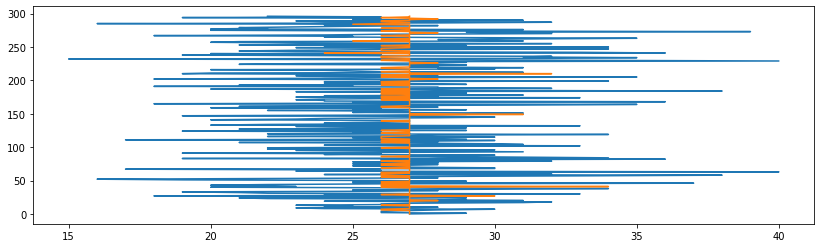

In [23]:
#minist controlled expo
base_path = "../../out/real_world"
dataset_titles = ["mnist"]

path_normals = [f'{base_path}/mnist-prox']
path_enhanced = [f'{base_path}/mnist-enhanced']


plot_dataset_compare_3(path_normals,path_enhanced,dataset_titles)